In [3]:
from abc import ABC, abstractmethod
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### Generating dataset

In [4]:
def generate_data(n=100):
    result = random.choices([0, 1], weights=[0.1, 0.9], k=n)
    result = np.array(result, dtype=float)
    result[result == 0] = np.random.normal(10, 1, len(result[result == 0]))
    result[result == 1] = np.random.normal(5, 1, len(result[result == 1]))
    return result

### Implementation

In [5]:
class kde:
    __slots__ = ["kernel_type", "bandwidth", "data", "n"]

    def __init__(self, kernel_type="gaussian", bandwidth=1):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = data
        self.n = len(data)

    @abstractmethod
    def gaussian_kernel(self, x, mean, std):
        return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

    @abstractmethod
    def top_hat_kernel(self, x, mean, std):
        return (np.abs(x - mean) <= std) / (2 * std)

    @abstractmethod
    def epanechnikov_kernel(self, x, mean, std):
        return 3 / 4 * (1 - ((x - mean) / std) ** 2) * (np.abs(x - mean) <= std) / std

    @abstractmethod
    def exponential_kernel(self, x, mean, std):
        return np.exp(-np.abs(x - mean) / std) / (2 * std)

    def transform(self, x):
        solution = np.zeros(len(x))
        for data_point in self.data:
            if self.kernel_type == "gaussian":
                solution += self.gaussian_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "top_hat":
                solution += self.top_hat_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "epanechnikov":
                solution += self.epanechnikov_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            elif self.kernel_type == "exponential":
                solution += self.exponential_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            else:
                raise ValueError("Invalid kernel type")
        return solution / (self.n)

### Testing if everything is working correctly and intuitions

#### Kernels with n = 100

##### top hat

Text(0.5, 1.0, 'Kernel Density Estimation, Top Hat with bandwidth=1, n=100')

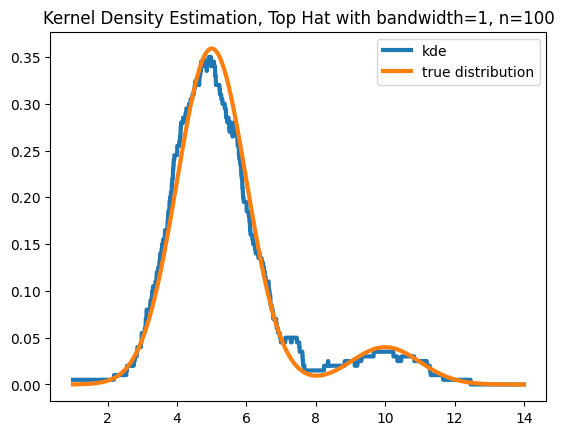

In [5]:
kd = kde(kernel_type="top_hat", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Top Hat with bandwidth=1, n=100")

##### epanechnikow

Text(0.5, 1.0, 'Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100')

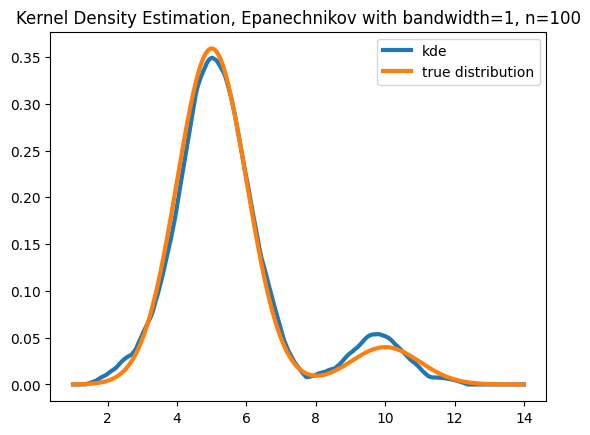

In [ ]:
kd = kde(kernel_type="epanechnikov", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100")

##### exponential

Text(0.5, 1.0, 'Kernel Density Estimation, Exponential with bandwidth=0.4, n=100')

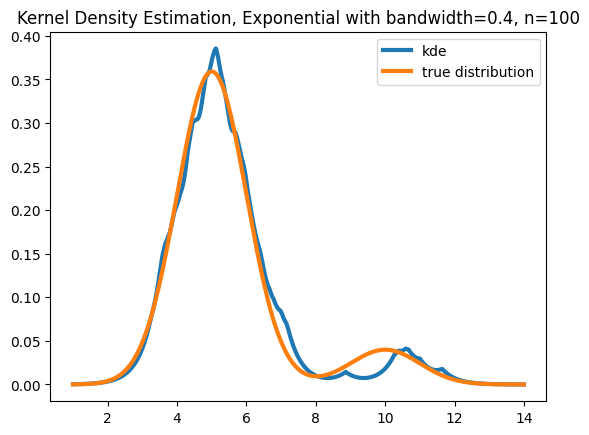

In [ ]:
kd = kde(kernel_type="exponential", bandwidth=0.4)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Exponential with bandwidth=0.4, n=100")

##### gaussian

Text(0.5, 1.0, 'Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100')

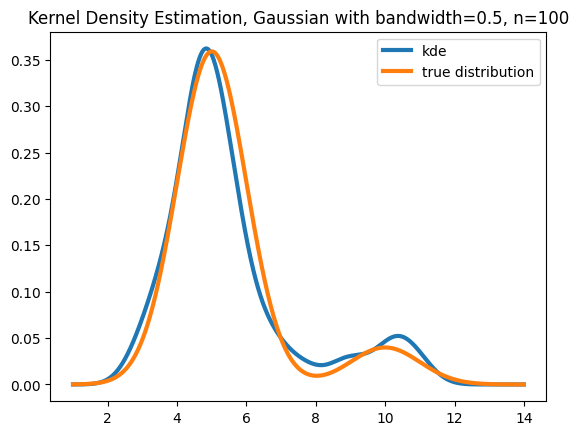

In [ ]:
kd = kde(kernel_type="gaussian", bandwidth=0.5)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100")

All kernels works as intended, event thought I didn't show this phenomena I discovered that kernel type don't matter if sample size is big enough. Thats why I showed differences on n = 100. Then we can see various strategies of smoothing.

#### Intuitions (tested only on gaussian kernel)

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=1, n=10000')

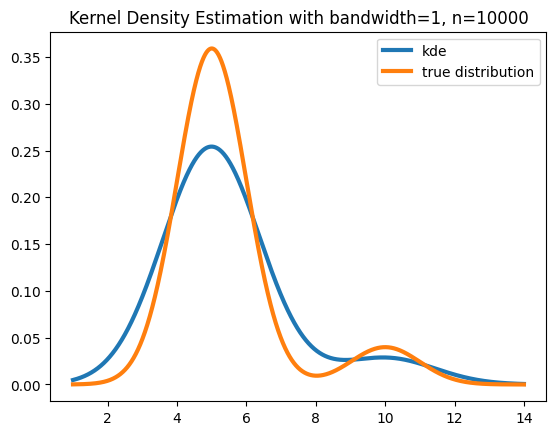

In [ ]:
kd = kde(bandwidth=1)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=1, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=3, n=10000')

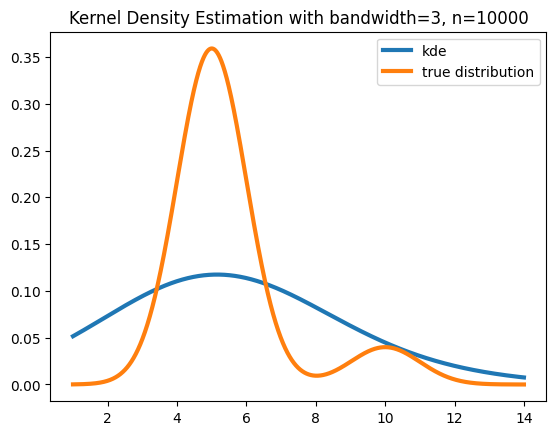

In [ ]:
kd = kde(bandwidth=3)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=3, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.5, n=10000')

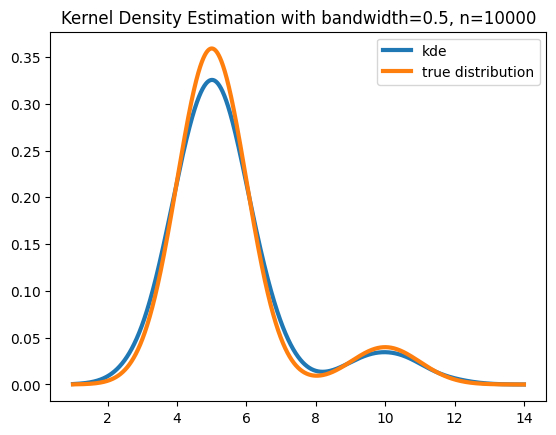

In [ ]:
kd = kde(bandwidth=0.5)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.5, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=10000')

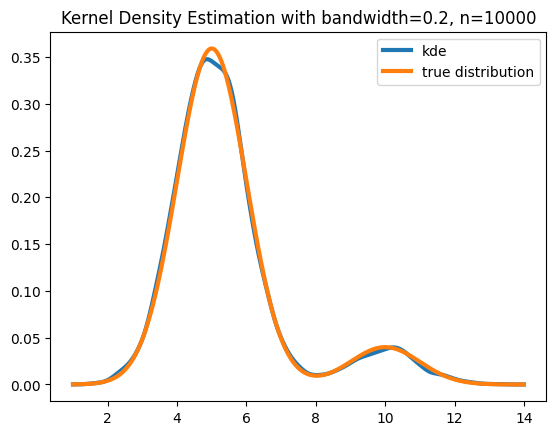

In [ ]:
kd = kde(bandwidth=0.2)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=10000")

This configuration seems optimal. What will happened if I change size of input data

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=100')

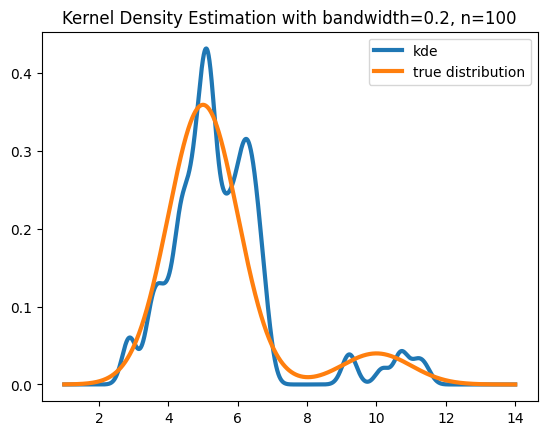

In [ ]:
kd = kde(bandwidth=0.2)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=100")

We can see that with change of n, optimal bandwidth also changes, they are dependent

The theory says that optimal bandwidth is proportional to n^(-1/5), lets say that 0.2 was optimal for 10000, then c = 0.2/10000^(-1/5), and new optimal bandwidth h_opt = c * 100^(-1/5) = 0.5

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.5, n=100')

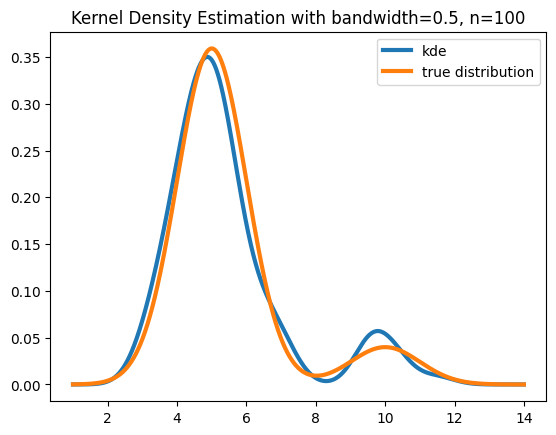

In [56]:
kd = kde(bandwidth=0.5)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.5, n=100")

### compute mse

In [8]:
bandwidths = np.linspace(0.1, 1, 50)
sample_sizes = np.linspace(50, 10000, 50, dtype=int)
errors = np.zeros((len(bandwidths), len(sample_sizes)))

for i, bandwidth in enumerate(bandwidths):
    for j, sample_size in enumerate(sample_sizes):
        for _ in range(1):
            kd = kde(bandwidth=bandwidth)
            data = generate_data(sample_size)
            kd.fit(data)
            errors[i, j] += np.mean(
                (
                    kd.transform(np.linspace(1, 14, 5000))
                    - (
                        0.1
                        * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                        / (1 * np.sqrt(2 * np.pi))
                        + 0.9
                        * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                        / (1 * np.sqrt(2 * np.pi))
                    )
                )
                ** 2
            )

Text(0.5, 1.0, 'Visualization of error')

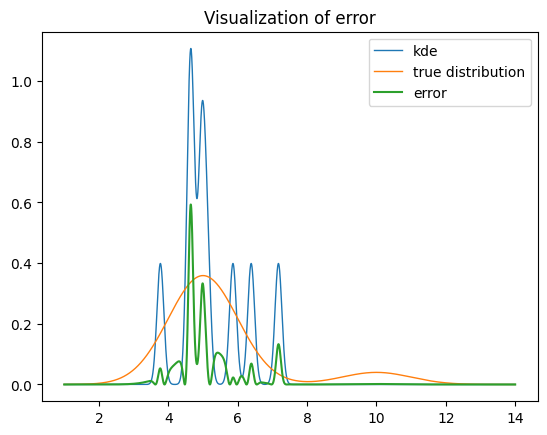

In [23]:
kd = kde(bandwidth=0.1)

data = generate_data(10)
kd.fit(data)

plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=1,
)

plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=1,
)

plt.plot(
    np.linspace(1, 14, 5000),
    1
    * (
        kd.transform(np.linspace(1, 14, 5000))
        - (
            0.1
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
            + 0.9
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
        )
    )
    ** 2,
    label="error",
)
plt.legend()
plt.title("Visualization of error")

Text(0.5, 1.0, 'log(1/Error) of KDE')

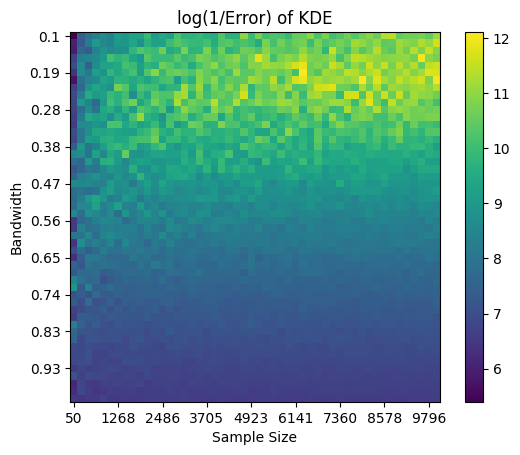

In [9]:
# make a heat map of error with low values being green and high values being red
plt.imshow(np.log(1 / errors))
plt.colorbar()
plt.xlabel("Sample Size")
plt.xticks(np.arange(0, 50, 6), sample_sizes[::6])
plt.ylabel("Bandwidth")
plt.yticks(np.arange(0, 50, 5), np.round(bandwidths[::5], 2))
plt.title("log(1/Error) of KDE")

### Random Jitter

In [6]:
for i in range(100):
    plain_data_mse = []
    data = generate_data(200)
    kd = kde(bandwidth=0.45)
    kd.fit(data)
    plain_data_mse.append(
        np.mean(
            (
                kd.transform(np.linspace(1, 14, 5000))
                - (
                    0.1
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                    + 0.9
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                )
            )
            ** 2
        )
    )

    jittered_data_mse = []
    data = np.random.choice(data, 10000)
    bandwidth = 0.2
    data = data + np.random.normal(0, 1, 10000) * bandwidth
    kd = kde(bandwidth=bandwidth)
    kd.fit(data)
    jittered_data_mse.append(
        np.mean(
            (
                kd.transform(np.linspace(1, 14, 5000))
                - (
                    0.1
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                    + 0.9
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                )
            )
            ** 2
        )
    )

Text(0.5, 1.0, 'Mean Squared Error of KDE with and without Jittering')

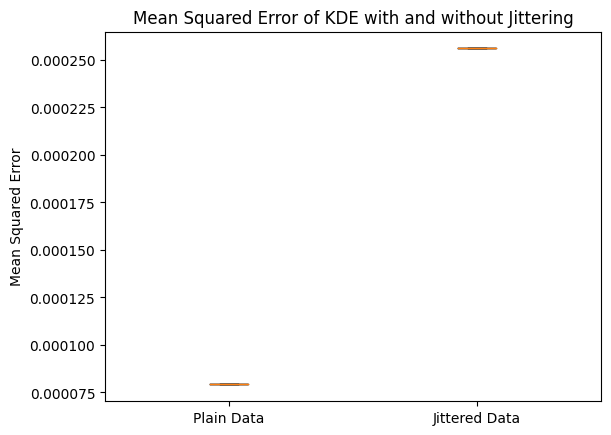

In [7]:
# make a box plot of the errors
plt.boxplot([plain_data_mse, jittered_data_mse])
plt.xticks([1, 2], ["Plain Data", "Jittered Data"])
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error of KDE with and without Jittering")

### Comparison with other methods on real data

In [ ]:
class NB:
    """

    Methods:
        fit(X, y): Fit the Naive Bayes classifier to the training data.
        predict_proba(X_test): Predict the class probabilities for the test data.
        predict(X_test): Predict the class labels for the test data.
        return_params(): Return the parameters of the Naive Bayes classifier.
    """

    def __init__(self) -> None:
        self.sigma_0 = None
        self.sigma_1 = None
        self.mu_0 = None
        self.mu_1 = None
        self.fraction_0 = None
        self.fraction_1 = None

    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Args:
            X (DataFrame): Training data features.
            y (array-like): Training data labels.
        """
        y = pd.DataFrame(y, columns=["y"])
        data = pd.concat([X, y], axis=1)
        data_0 = data[data["y"] == 0]
        data_1 = data[data["y"] == 1]
        data_0 = data_0.drop(columns="y")
        data_1 = data_1.drop(columns="y")

        self.sigma_0 = np.diag(np.diag(data_0.cov()))
        self.sigma_1 = np.diag(np.diag(data_1.cov()))
        self.mu_0 = data_0.mean()
        self.mu_1 = data_1.mean()
        self.fraction_0 = len(data_0) / len(data)
        self.fraction_1 = len(data_1) / len(data)

    def predict_proba(self, X_test):
        """
        Predict the class probabilities for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            ndarray: Predicted class probabilities.
        """
        probabilities = []
        for _, row in X_test.iterrows():
            numerator = self.fraction_1 * self.gaussian(row, self.mu_1, self.sigma_1)
            denominator = self.fraction_1 * self.gaussian(
                row, self.mu_1, self.sigma_1
            ) + self.fraction_0 * self.gaussian(row, self.mu_0, self.sigma_0)
            if denominator == 0:
                probabilities.append(0)
            else:
                probabilities.append(numerator / denominator)
        return probabilities

    def predict(self, X_test):
        """
        Predict the class labels for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            Series: Predicted class labels.
        """
        X_test_copy = X_test.copy()
        X_test_copy["predicted_proba"] = self.predict_proba(X_test)
        X_test_copy["y_pred"] = 0
        X_test_copy.loc[X_test_copy["predicted_proba"] > 0.5, "y_pred"] = 1
        return X_test_copy["y_pred"]

In [9]:
sa_data = pd.read_csv("data/SAheart.data")
sa_data = sa_data.drop("row.names", axis=1)
sa_data["famhist"] = sa_data["famhist"].map({"Present": 1, "Absent": 0})
y_real = sa_data["chd"]
x_real = sa_data.drop("chd", axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_real, y_real, test_size=0.2)


# import from sklearn gaussian naive bayes, lda, categorical naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


cnb = CategoricalNB()

cnb.fit(x_train, y_train)

print(gnb.score(x_test, y_test))
print(lda.score(x_test, y_test))
print(cnb.score(x_test, y_test))

0.7096774193548387
0.7741935483870968


IndexError: index 46 is out of bounds for axis 1 with size 46